In [9]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def load_pkl(file_path):
    with open(file_path, "rb") as f:
        fig = pickle.load(f)

    ax = fig.axes[0]

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    scatter_data = [collection.get_offsets() for collection in ax.collections]
    data = [np.array(data) for data in scatter_data]
    line_data = [line.get_data() for line in ax.lines]
    handles, labels = ax.get_legend_handles_labels()

    return {
    'scatter_data': scatter_data,
    'data': data,
    'line_data': line_data,
    'handles': handles,
    'labels': labels,
    'x_min': x_min,
    'x_max': x_max,
    'y_min': y_min,
    'y_max': y_max
}

PNA_no_edge = load_pkl(
    "logs/pna_100ep_1e-4_pc90_b4_k5_hd64_head_32_pickle/bulk.pkl")

PNA_edge = load_pkl(
    "logs/pna_100ep_1e-4_pc90_b4_k5_hd64_head_32_edge/bulk.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'logs/pna_100ep_1e-4_pc90_b4_k5_hd64_head_32_pickle/bulk.pkl'

In [ ]:
x = PNA_no_edge['data'][0][:, 0]
y = PNA_no_edge['data'][0][:, 1]

# Fit a line to the data
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Generate y-values for the line
y_fit = polynomial(x)

(0.8027754724025726, 0.8784225285053253)

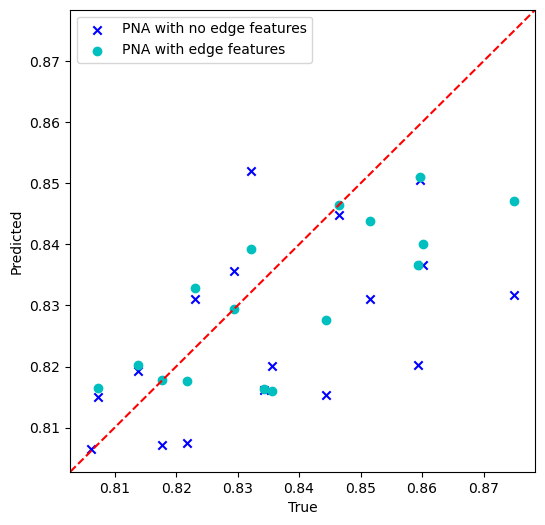

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(PNA_no_edge['data'][0][:, 0], PNA_no_edge['data'][0][:, 1], 
           c="blue", label="PNA with no edge features", marker="x")

ax.scatter(PNA_edge['data'][0][:, 0], PNA_edge['data'][0][:, 1], 
           c="c", label="PNA with edge features", marker="o")

ax.plot(PNA_no_edge['line_data'][0][0], PNA_no_edge['line_data'][0][1], 
        c="red",linestyle="--")

#plt.plot(x, y_fit, color='k')

ax.legend()

ax.set_xlabel("True")
ax.set_ylabel("Predicted")

ax.set_xlim([PNA_no_edge['x_min'], PNA_no_edge['x_max']])
ax.set_ylim([PNA_no_edge['x_min'], PNA_no_edge['x_max']])

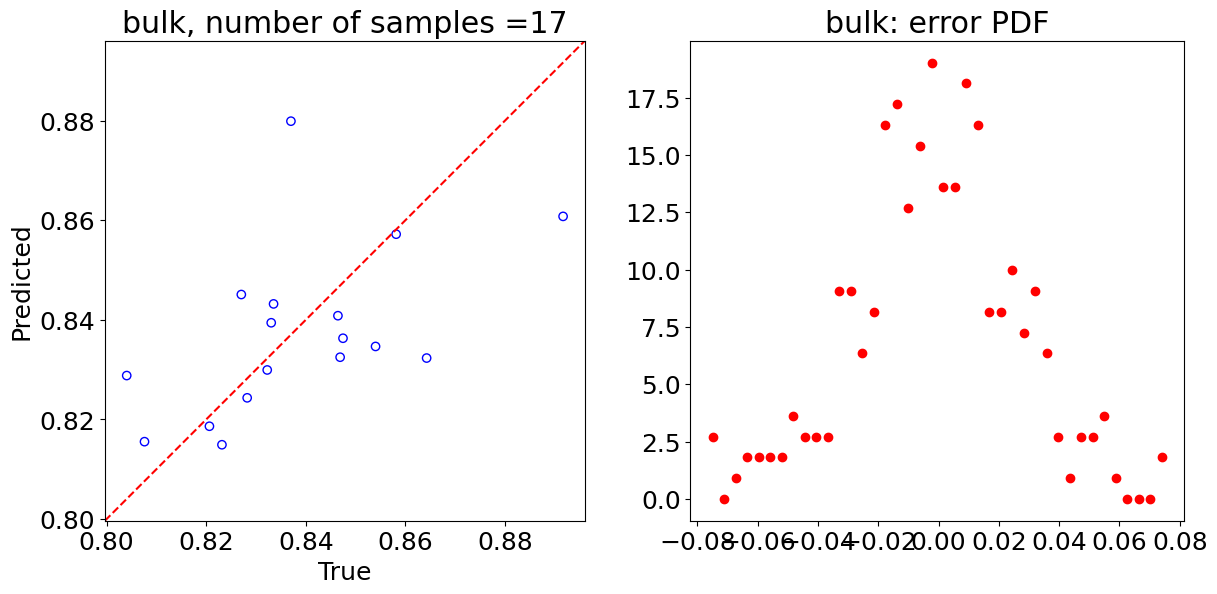

In [ ]:
PNA_shuffled = load_pkl(
    "logs/pna_100ep_1e-4_pc90_b4_k5_hd64_head_32_edge_shuffled/bulk.pkl")

(0.7996467649936676, 0.896100252866745)

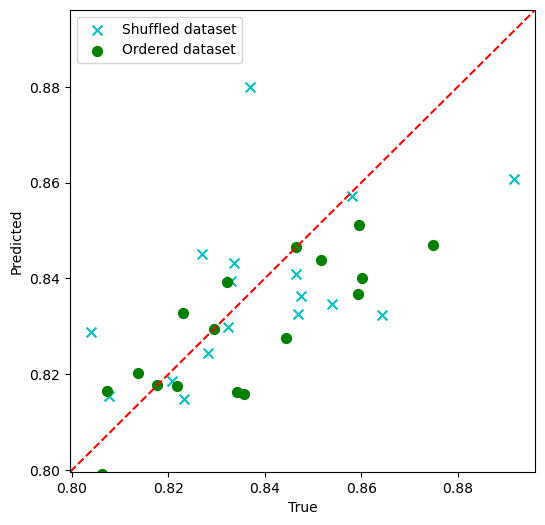

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(PNA_shuffled['data'][0][:, 0], PNA_shuffled['data'][0][:, 1], 
           c="c", label="Shuffled dataset", marker="x", s=50)

ax.scatter(PNA_edge['data'][0][:, 0], PNA_edge['data'][0][:, 1], 
           c="g", label="Ordered dataset", marker="o", s=50)

ax.plot(PNA_shuffled['line_data'][0][0], PNA_shuffled['line_data'][0][1], 
        c="red",linestyle="--")

#plt.plot(x, y_fit, color='k')

ax.legend()

ax.set_xlabel("True")
ax.set_ylabel("Predicted")

ax.set_xlim([PNA_shuffled['x_min'], PNA_shuffled['x_max']])
ax.set_ylim([PNA_shuffled['x_min'], PNA_shuffled['x_max']])

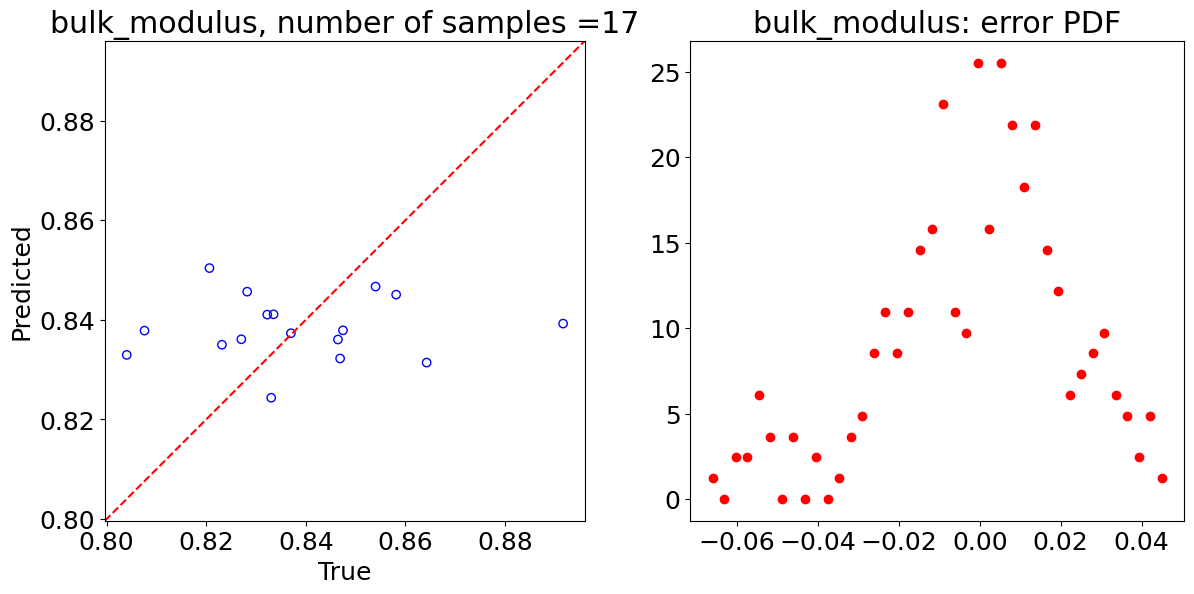

In [ ]:
GIN_shuffled = load_pkl(
    "../voronoi/m1_vo32/logs/gin_100ep_1e-4_pc90_b4_k5_hd64_head_32_edge_shuffled/bulk_modulus.pkl")

NameError: name 'PNA_shuffled' is not defined

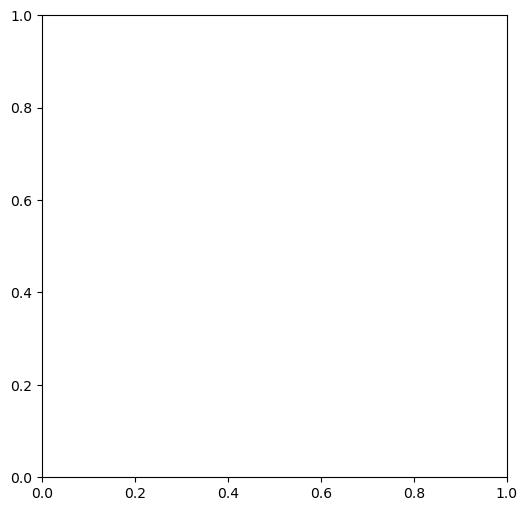

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(PNA_shuffled['data'][0][:, 0], PNA_shuffled['data'][0][:, 1], 
           c="blue", label="PNA with edge features", marker="o", s=50)

ax.scatter(GIN_shuffled['data'][0][:, 0], GIN_shuffled['data'][0][:, 1], 
           c="g", label="GIN", marker="*", s=50)

ax.plot(PNA_shuffled['line_data'][0][0], PNA_shuffled['line_data'][0][1], 
        c="red",linestyle="--")

#plt.plot(x, y_fit, color='k')

ax.legend()

ax.set_xlabel("True")
ax.set_ylabel("Predicted")

ax.set_xlim([PNA_shuffled['x_min'], PNA_shuffled['x_max']])
ax.set_ylim([PNA_shuffled['x_min'], PNA_shuffled['x_max']])

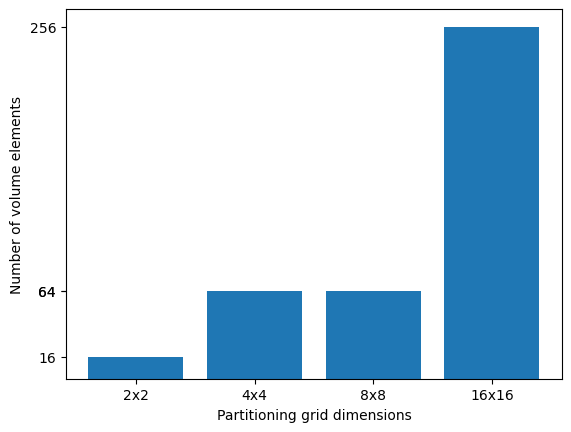

In [5]:
quantities = [2*2*4, 16*4, 64, 256]
labels = ['2x2', '4x4', '8x8', '16x16']

# Plot the histogram
plt.bar(labels, quantities)

# Add labels and title
plt.xlabel('Partitioning grid dimensions')
plt.ylabel('Number of volume elements')
#plt.title('Histogram of Quantities')

plt.yticks(quantities)

# Show the plot
plt.show()